In [1]:
from models.vq_vae import VQVAE, VQVAEModule, VQVAEModule1D

In [2]:
num_hiddens = 128
num_residual_hiddens = 32
num_residual_layers = 2

embedding_dim = 10
num_embeddings = 512

commitment_cost = 0.25

# decay = 0.99
# learning_rate = 1e-3

In [3]:
model = VQVAEModule1D(num_hiddens, num_residual_layers, num_residual_hiddens, num_embeddings, embedding_dim, commitment_cost, decay=0.99)
vae = VQVAE(model, image_size=64)

cuda


In [4]:
from carla_disentanglement.datasets.dsprites import DSpritesDataset
ds = DSpritesDataset()

In [5]:
def display_image(image):
    display(image, metadata={'width': '100%'})

import matplotlib.pyplot as plt
import numpy as np

stats = {
    'losses': [[0,0]],
    'eval_losses': [],
    'eval_scores': []
}

def addLoss(losses):
    stats['losses'] = losses

def addEval(eval_losses, eval_scores, eval_step = 1):
    stats['eval_losses'] = eval_losses
    stats['eval_scores'] = eval_scores

    fig, axs = plt.subplots(2, 3, figsize=(20,15))
    data = np.array(stats['losses'])
    eval_data = np.array(eval_losses)
    axs[0, 0].plot(range(len(data)), data[:,1], label='train recon loss')
    axs[0, 0].plot(range(0, len(eval_data)*eval_step, eval_step), eval_data[:,1], label='test recon loss')
    axs[0, 0].legend()

    axs[0, 1].plot(range(len(data)), data[:,2], label='train vq loss')
    axs[0, 1].plot(range(0, len(eval_data)*eval_step, eval_step), eval_data[:,2], label='test vq loss')
    axs[0, 1].legend()

    axs[0, 2].plot(range(len(data)), data[:,0], label='train loss')
    axs[0, 2].plot(range(0, len(eval_data)*eval_step, eval_step), eval_data[:,0], label='test loss')
    axs[0, 2].legend()

    score_data = np.array(eval_scores)
    axs[1, 0].plot(score_data[:,0], label='beta-vae-score train')
    axs[1, 0].plot(score_data[:,1], label='beta-vae-score test')
    axs[1, 0].legend()

    axs[1, 2].plot(range(len(data)), data[:,3], label='train perplexity')
    axs[1, 2].plot(range(0, len(eval_data)*eval_step, eval_step), eval_data[:,3], label='test perplexity')
    axs[1, 2].legend()


    plt.show()

In [6]:
# vae.train(ds, epochs=20, reconstruction_every=1, reconstruction_callback=display_image, loss_callback=addLoss, eval_every=1, eval_callback=addEval, batch_size=512, num_workers=0, reconstruct_indices=[0,4300, 200000, -554, -20000, 737280/2+500])

In [7]:
vae.loadModel('vae_0_2021-04-22_12-14-01_128.13843.save')

In [8]:
vae.visualize_latents(ds)

KeyboardInterrupt: 

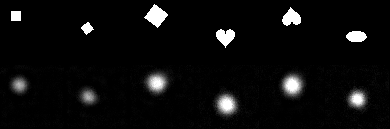

In [9]:
vae.visualize_reconstruction(ds, indices=[0,4300, 200000, -554, -20000, 737280/2+500])

In [11]:
vae.visualize_latents(ds)

'./viz/vae_2021-04-22_14-28-32.gif'